# Week 3 Totorial
This notebook serves as support material to implement the game of `TicTacToe` by several algorithms studied in **Chapter 5 - Adversarial Search**, i.e., *minimax search algorithm*, *alpha-beta pruning algorithm*, and *monte carlo tree search algorithm*. 

# Game representation

To represent games we make use of the `Game` class, which we can subclass and override its functions to represent our own games. A helper tool is the namedtuple `GameState`, which in some cases can come in handy, especially when our game needs us to remember a board.



## `GameState` namedtuple

`GameState` is a [namedtuple](https://docs.python.org/3.5/library/collections.html#collections.namedtuple) which represents the current state of a game. It is used to help represent games whose states can't be easily represented normally, or for games that require memory of a board.

`Gamestate` is defined as follows:

`GameState = namedtuple('GameState', 'to_move, utility, board, moves')`

* `to_move`: It represents whose turn it is to move next.

* `utility`: It stores the utility of the game state. Storing this utility is a good idea, because, when you do a Minimax Search or an Alphabeta Search, you generate many recursive calls, which travel all the way down to the terminal states. When these recursive calls go back up to the original callee, we have calculated utilities for many game states. We store these utilities in their respective `GameState`s to avoid calculating them all over again.

* `board`: A dict that stores the board of the game.

* `moves`: It stores the list of legal moves possible from the current position.

## `Game` class

Let's have a look at the class `Game` in our module. We see that it has functions, namely `actions`, `result`, `utility`, `terminal_test`, `to_move` and `display`.

We see that these functions have not actually been implemented. This class is just a template class; we are supposed to create the class for our game, by inheriting this `Game` class and implementing all the methods mentioned in `Game`.

Now let's get into details of all the methods in our `Game` class. You have to implement these methods when you create new classes that would represent your game.

* `actions(self, state)`: Given a game state, this method generates all the legal actions possible from this state, as a list or a generator. Returning a generator rather than a list has the advantage that it saves space and you can still operate on it as a list.


* `result(self, state, move)`: Given a game state and a move, this method returns the game state that you get by making that move on this game state.


* `utility(self, state, player)`: Given a terminal game state and a player, this method returns the utility for that player in the given terminal game state. While implementing this method assume that the game state is a terminal game state. The logic in this module is such that this method will be called only on terminal game states.


* `terminal_test(self, state)`: Given a game state, this method should return `True` if this game state is a terminal state, and `False` otherwise.


* `to_move(self, state)`: Given a game state, this method returns the player who is to play next. This information is typically stored in the game state, so all this method does is extract this information and return it.


* `display(self, state)`: This method prints/displays the current state of the game.

Let's import some necessary packages and define `GameState`.

In [1]:
# -*- coding: utf-8 -*-

import random
import datetime
from collections import namedtuple
import numpy as np

GameState = namedtuple('GameState', 'to_move, utility, board, moves')

Accordingly, we can define the class `Game` as follows.

In [2]:
class Game:
    """A game is similar to a problem, but it has a utility for each
    state and a terminal test instead of a path cost and a goal
    test. To create a game, subclass this class and implement actions,
    result, utility, and terminal_test. You may override display and
    successors or you can inherit their default methods. You will also
    need to set the .initial attribute to the initial state; this can
    be done in the constructor."""

    def actions(self, state):
        """Return a list of the allowable moves at this point."""
        raise NotImplementedError

    def result(self, state, move):
        """Return the state that results from making a move from a state."""
        raise NotImplementedError

    def utility(self, state, player):
        """Return the value of this final state to player."""
        raise NotImplementedError

    def terminal_test(self, state):
        """Return True if this is a final state for the game."""
        return not self.actions(state)

    def to_move(self, state):
        """Return the player whose move it is in this state."""
        return state.to_move

    def display(self, state):
        """Print or otherwise display the state."""
        print(state)

    def __repr__(self):
        return '<{}>'.format(self.__class__.__name__)

    def play_game(self, *players):
        """Play an n-person, move-alternating game."""
        state = self.initial
        while True:
            for player in players:
                move = player(self, state)
                state = self.result(state, move)
                if self.terminal_test(state):
                    self.display(state)
                    return self.utility(state, self.to_move(self.initial))


# Tic-Tac-Toe
Take a look at Figure 5.1 to recall how to construct the game tree for `TicTacToe`.

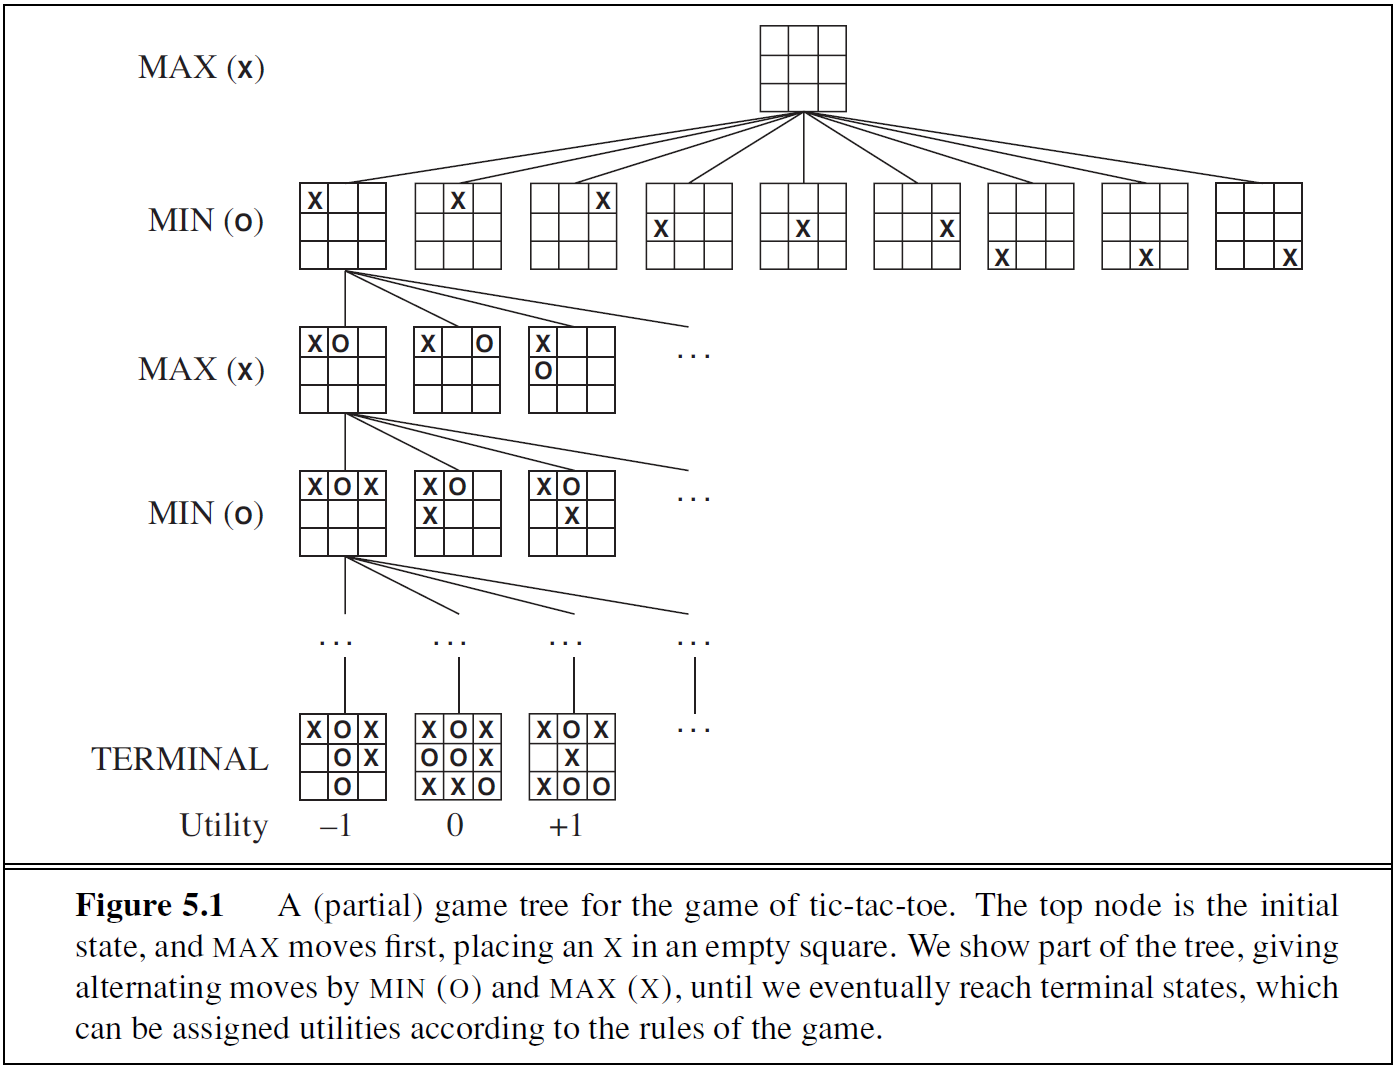

The class `TicTacToe` has been inherited from the class `Game`. 

Additional methods in TicTacToe:

* `__init__(self, h=3, v=3, k=3)` :  When you create a class inherited from the `Game` class (class `TicTacToe` in our case), you'll have to create an object of this inherited class to initialize the game. This initialization might require some additional information which would be passed to `__init__` as variables. For the case of our `TicTacToe` game, this additional information would be the number of rows `h`, number of columns `v` and how many consecutive X's or O's are needed in a row, column or diagonal for a win `k`. Also, the initial game state has to be defined here in `__init__`.


* `compute_utility(self, board, move, player)` : A method to calculate the utility of TicTacToe game. If 'X' wins with this move, this method returns 1; if 'O' wins return -1; else return 0.


* `k_in_row(self, board, move, player, delta_x_y)` : This method returns `True` if there is a line formed on TicTacToe board with the latest move else `False.`

### TicTacToe GameState

Now, before we start implementing our `TicTacToe` game, we need to decide how we will be representing our game state. Typically, a game state will give you all the current information about the game at any point in time. When you are given a game state, you should be able to tell whose turn it is next, how the game will look like on a real-life board (if it has one) etc. A game state need not include the history of the game. If you can play the game further given a game state, you game state representation is acceptable. While we might like to include all kinds of information in our game state, we wouldn't want to put too much information into it. Modifying this game state to generate a new one would be a real pain then.

Now, as for our `TicTacToe` game state, would storing only the positions of all the X's and O's be sufficient to represent all the game information at that point in time? Well, does it tell us whose turn it is next? Looking at the 'X's and O's on the board and counting them should tell us that. But that would mean extra computing. To avoid this, we will also store whose move it is next in the game state.


To store game states will will use the `GameState` namedtuple.

* `to_move`: A string of a single character, either 'X' or 'O'.

* `utility`: 1 for win, -1 for loss, 0 draw.

* `board`: All the positions of X's and O's on the board.

* `moves`: All the possible moves from the current state. Note here, that storing the moves as a list, as it is done here, increases the space complexity of Minimax Search from `O(m)` to `O(bm)`. Refer to Sec. 5.2.1 of the book.

In [3]:
class TicTacToe(Game):
    """Play TicTacToe on an h x v board, with Max (first player) playing 'X'.
    A state has the player to move, a cached utility, a list of moves in
    the form of a list of (x, y) positions, and a board, in the form of
    a dict of {(x, y): Player} entries, where Player is 'X' or 'O'."""

    def __init__(self, h=3, v=3, k=3):
        self.h = h
        self.v = v
        self.k = k
        moves = [(x, y) for x in range(1, h + 1)
                 for y in range(1, v + 1)]
        self.initial = GameState(to_move='X', utility=0, board={}, moves=moves)

    def actions(self, state):
        """Legal moves are any square not yet taken."""
        return state.moves

    def result(self, state, move):
        if move not in state.moves:
            return state  # Illegal move has no effect
        board = state.board.copy()
        board[move] = state.to_move
        moves = list(state.moves)
        moves.remove(move)
        return GameState(to_move=('O' if state.to_move == 'X' else 'X'),
                         utility=self.compute_utility(board, move, state.to_move),
                         board=board, moves=moves)

    def utility(self, state, player):
        """Return the value to player; 1 for win, -1 for loss, 0 otherwise."""
        return state.utility if player == 'X' else -state.utility

    def terminal_test(self, state):
        """A state is terminal if it is won or there are no empty squares."""
        return state.utility != 0 or len(state.moves) == 0

    def display(self, state):
        board = state.board
        for x in range(1, self.h + 1):
            for y in range(1, self.v + 1):
                print(board.get((x, y), '.'), end=' ')
            print()

    def compute_utility(self, board, move, player):
        """If 'X' wins with this move, return 1; if 'O' wins return -1; else return 0."""
        if (self.k_in_row(board, move, player, (0, 1)) or
                self.k_in_row(board, move, player, (1, 0)) or
                self.k_in_row(board, move, player, (1, -1)) or
                self.k_in_row(board, move, player, (1, 1))):
            return +1 if player == 'X' else -1
        else:
            return 0

    def k_in_row(self, board, move, player, delta_x_y):
        """Return true if there is a line through move on board for player."""
        (delta_x, delta_y) = delta_x_y
        x, y = move
        n = 0  # n is number of moves in row
        while board.get((x, y)) == player:
            n += 1
            x, y = x + delta_x, y + delta_y
        x, y = move
        while board.get((x, y)) == player:
            n += 1
            x, y = x - delta_x, y - delta_y
        n -= 1  # Because we counted move itself twice
        return n >= self.k

We will define several game search algorithms. Each takes two inputs, the game `TicTacToe` we are playing and the current state of the game, and returns a a `(value, move)` pair, where `value` is the utility that the algorithm computes for the player whose turn it is to move, and `move` is the move itself.

# Minimax search algorithm
## Overview

This algorithm (often called *Minimax*) computes the next move for a player (MIN or MAX) at their current state. It recursively computes the minimax value of successor states, until it reaches terminals (the leaves of the tree). Using the `utility` value of the terminal states, it computes the values of parent states until it reaches the initial node (the root of the tree).

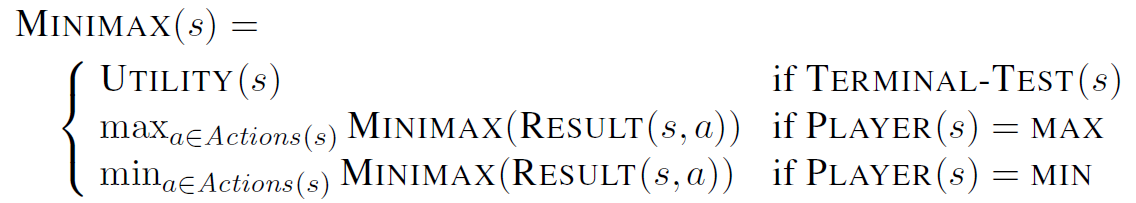

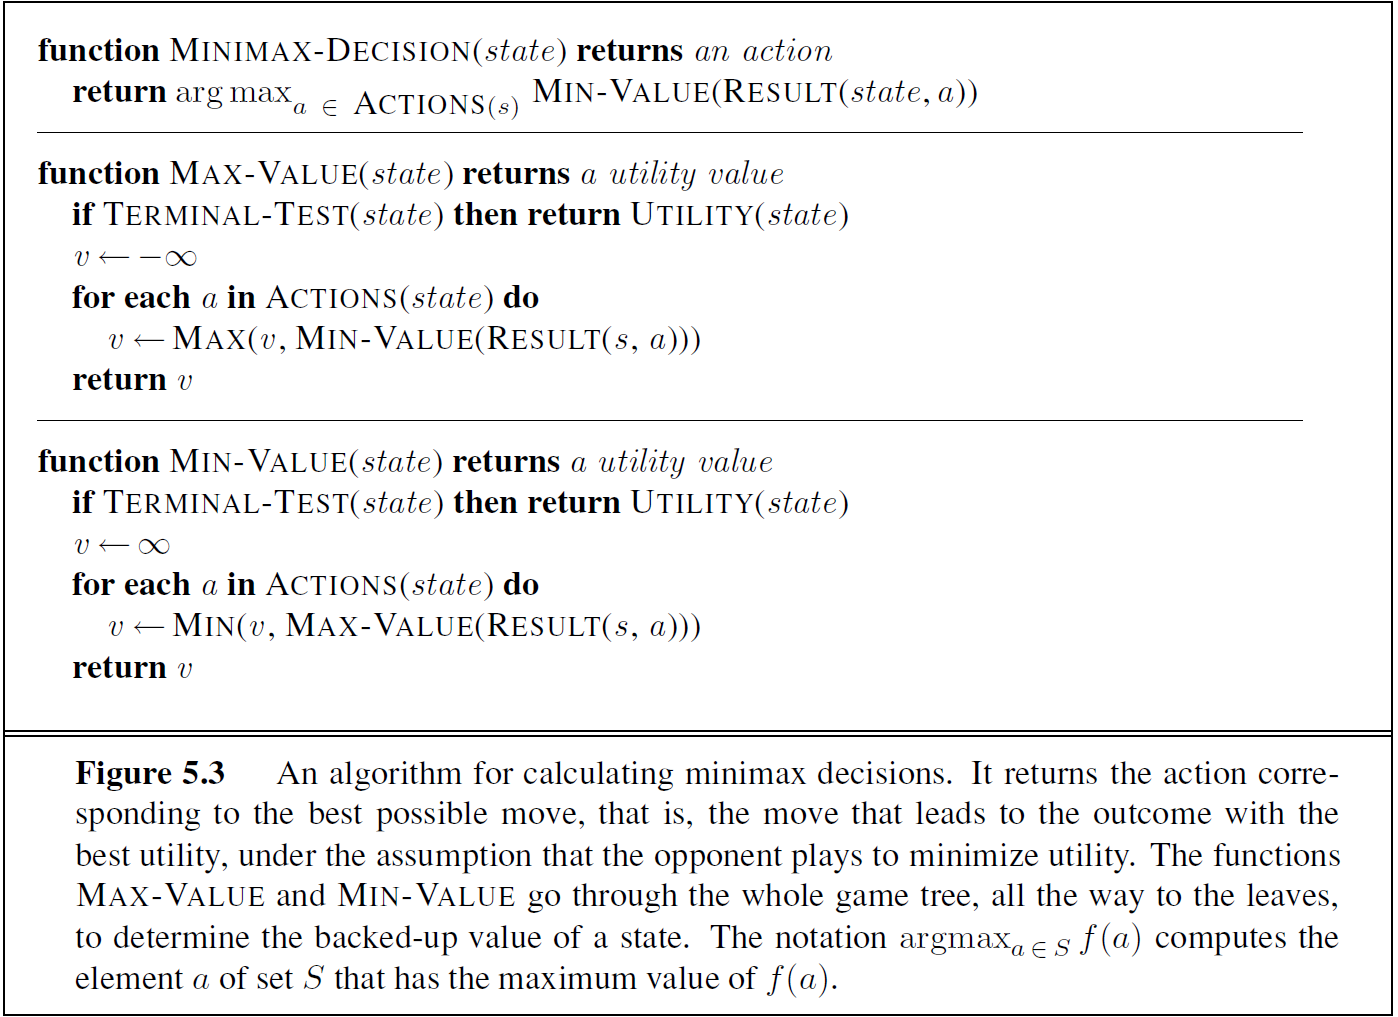

In [4]:
def minmax_decision(state, game):
    """Given a state in a game, calculate the best move by searching
    forward all the way to the terminal states."""
    starttime = datetime.datetime.now()
    player = game.to_move(state)

    def max_value(state):
        if game.terminal_test(state):
            return game.utility(state, player)
        v = -np.inf
        for a in game.actions(state):
            v = max(v, min_value(game.result(state, a)))
        return v

    def min_value(state):
        if game.terminal_test(state):
            return game.utility(state, player)
        v = np.inf
        for a in game.actions(state):
            v = min(v, max_value(game.result(state, a)))
        return v
    
    endtime = datetime.datetime.now()
    duringtime = endtime-starttime
    print("Elapsed time for minimax search algorithm: " + str(duringtime.microseconds) + " microseconds.")
    # Body of minmax_decision:
    return max(game.actions(state), key=lambda a: min_value(game.result(state, a)))


# Alpha-beta pruning algorithm

## Overview

While *Minimax* is great for computing a move, it can get tricky when the number of game states gets bigger. The algorithm needs to search all the leaves of the tree, which increase exponentially to its depth.

For Tic-Tac-Toe, where the depth of the tree is 9 (after the 9th move, the game ends), we can have at most 9! terminal states (at most because not all terminal nodes are at the last level of the tree; some are higher up because the game ended before the 9th move). This isn't so bad, but for more complex problems like chess, we have over $10^{40}$ terminal nodes. Unfortunately we have not found a way to cut the exponent away, but we nevertheless have found ways to alleviate the workload.

Here we examine *pruning* the game tree, which means removing parts of it that we do not need to examine. The particular type of pruning is called *alpha-beta*, and the search in whole is called *alpha-beta search*.

To showcase what parts of the tree we don't need to search, we will take a look at the example in Figure 5.2.

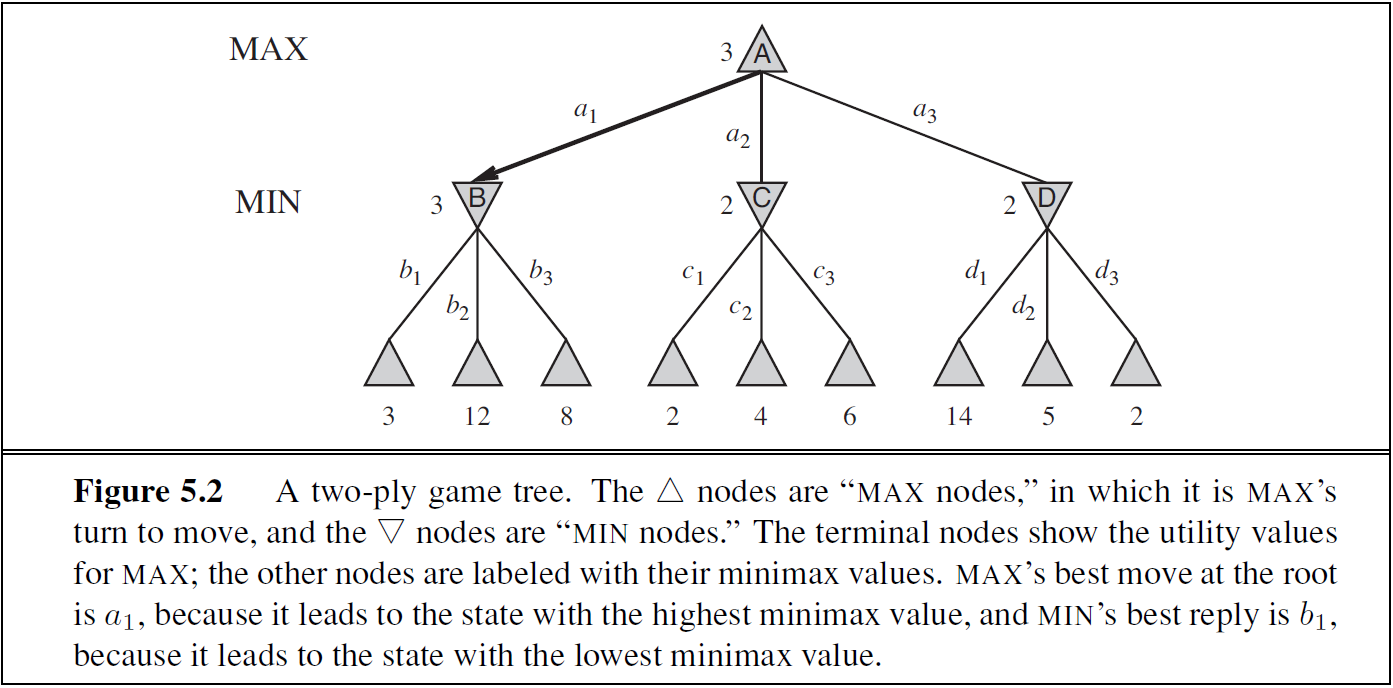

In the example game, we need to find the best move for player MAX at state A, which is the maximum value of MIN's possible moves at successor states.

`MAX(A) = MAX( MIN(B), MIN(C), MIN(D) )`

`MIN(B)` is the minimum of 3, 12, 8 which is 3. So the above formula becomes:

`MAX(A) = MAX( 3, MIN(C), MIN(D) )`

Next move we will check is c1, which leads to a terminal state with utility of 2. Before we continue searching under state C, let's pop back into our formula with the new value:

`MAX(A) = MAX( 3, MIN(2, c2, .... cN), MIN(D) )`

We do not know how many moves state C allows, but we know that the first one results in a value of 2. Do we need to keep searching under C? The answer is no. The value MIN will pick on C will at most be 2. Since MAX already has the option to pick something greater than that, 3 from B, he does not need to keep searching under C.

In *alpha-beta* we make use of two additional parameters for each state/node, *a* and *b*, that describe bounds on the possible moves. The parameter *a* denotes the best choice (highest value) for MAX along that path, while *b* denotes the best choice (lowest value) for MIN. As we go along we update *a* and *b* and prune a node branch when the value of the node is worse than the value of *a* and *b* for MAX and MIN respectively.

In the above example, after the search under state B, MAX had an *a* value of 3. So, when searching node C we found a value less than that, 2, we stopped searching under C.

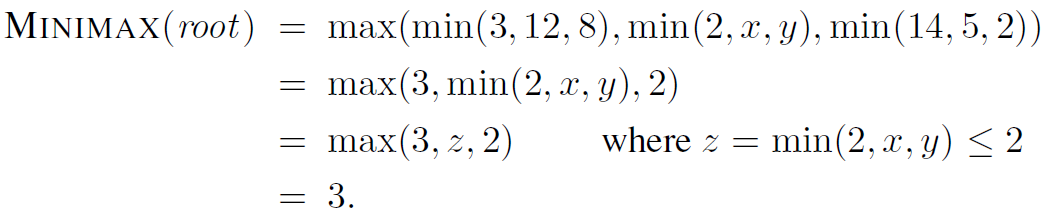

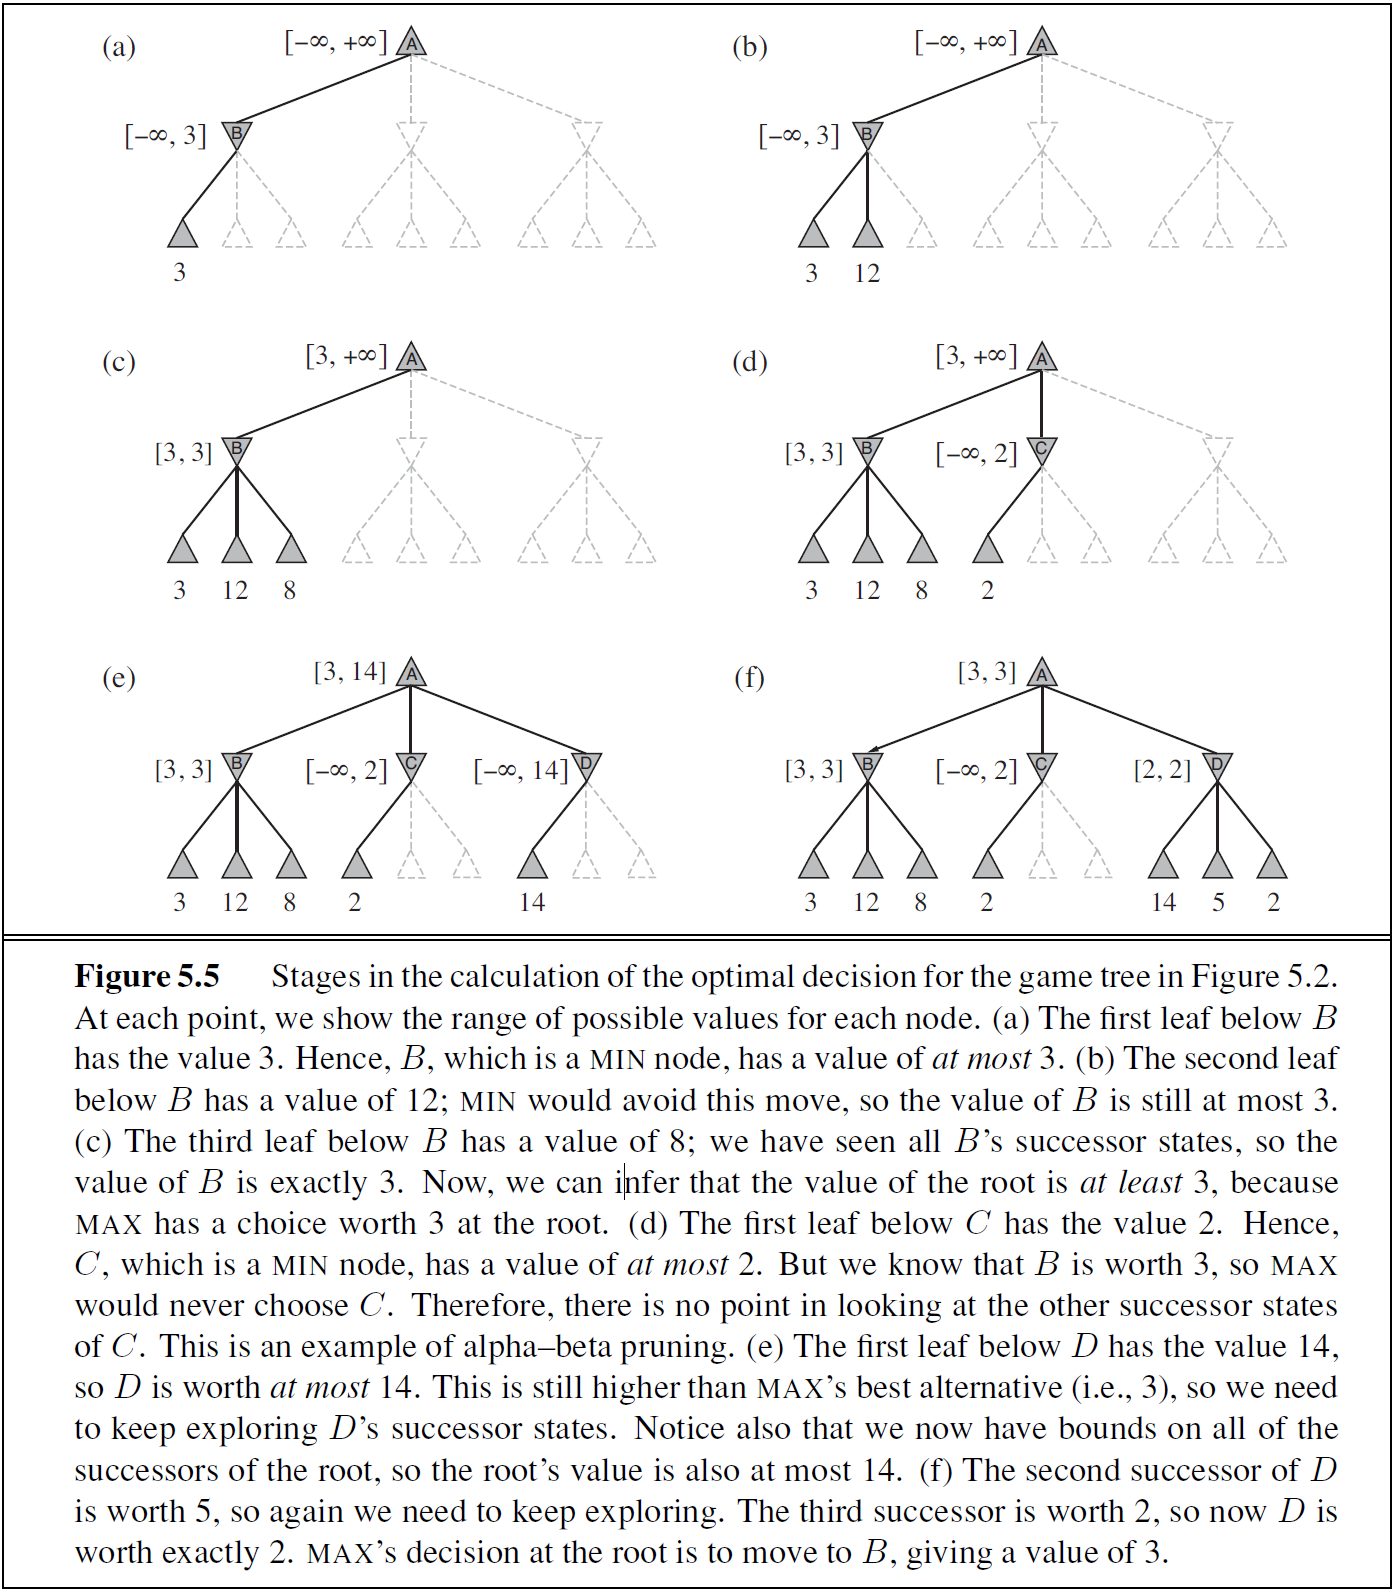

In [5]:
def alpha_beta_search(state, game):
    """Search game to determine best action; use alpha-beta pruning.
    As in [Figure 5.7], this version searches all the way to the leaves."""
    starttime = datetime.datetime.now()
    player = game.to_move(state)

    # Functions used by alpha_beta
    def max_value(state, alpha, beta):
        if game.terminal_test(state):
            return game.utility(state, player)
        v = -np.inf
        for a in game.actions(state):
            v = max(v, min_value(game.result(state, a), alpha, beta))
            if v >= beta:
                return v
            alpha = max(alpha, v)
        return v

    def min_value(state, alpha, beta):
        if game.terminal_test(state):
            return game.utility(state, player)
        v = np.inf
        for a in game.actions(state):
            v = min(v, max_value(game.result(state, a), alpha, beta))
            if v <= alpha:
                return v
            beta = min(beta, v)
        return v

    # Body of alpha_beta_search:
    best_score = -np.inf
    beta = np.inf
    best_action = None
    for a in game.actions(state):
        v = min_value(game.result(state, a), best_score, beta)
        if v > best_score:
            best_score = v
            best_action = a
    endtime = datetime.datetime.now()
    duringtime = endtime-starttime        
    print("Elapsed time for alpha-beta pruning algorithm: " + str(duringtime.microseconds) + " microseconds.")
    return best_action

# Monte carlo tree search (MCTS) algorithm
## Overview

MCTS is an algorithm that figures out the best move out of a set of moves by Selecting → Expanding → Simulating → Updating the nodes in tree to find the final solution. This method is repeated until it reaches the solution and learns the policy of the game.

1. `Selection`: Selecting good child nodes, starting from the root node, that represent states leading to better overall outcome (win).
2. `Expansion`: If it does not end the game, then create one or more child nodes and select one (C).
3. `Simulation (rollout)`: Run a simulated playout from C until a result is achieved.
4. `Backpropagation`: Update the current move sequence with the simulation result.


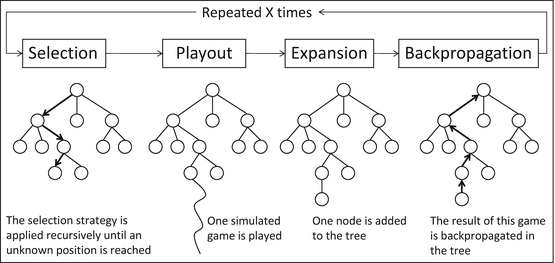

The flowchart for MCTS:

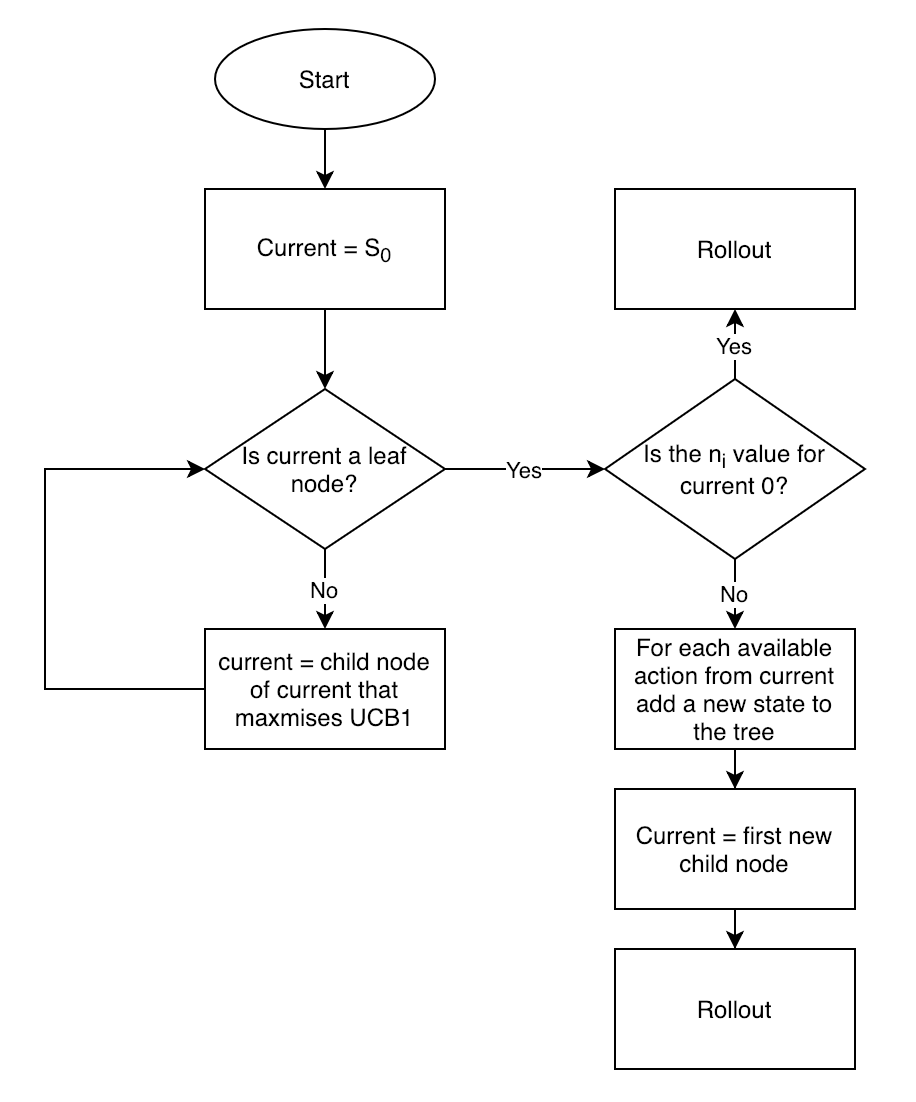

`UCB Value`: UCB1, or upper confidence bound for a node, is given by the following formula: 
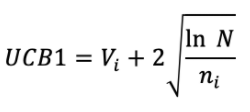
where 
- Vi is the average reward/value of all nodes beneath this node
- N is the number of times the parent node has been visited, and
- ni is the number of times the child node i has been visited

# Complete Walkthrough with an example

Iteration 1:

- We start with an initial state S0. Here, we have actions a1 and a2 which lead to states s1 and s2 with total score t and number of visits n. But how do we choose between the 2 child nodes?

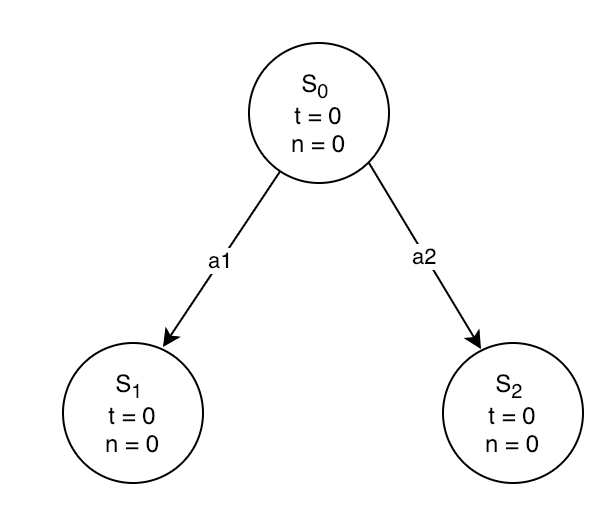

- This is where we calculate the UCB values for both the child nodes and take whichever node maximises that value. Since none of the nodes have been visited yet, the second term is infinite for both. Hence, we are just going to take the first node
- We are now at a leaf node where we need to check whether we have visited it. As it turns out, we haven’t. In this case, on the basis of the algorithm, we do a rollout all the way down to the terminal state. Let’s say the value of this rollout is 20.

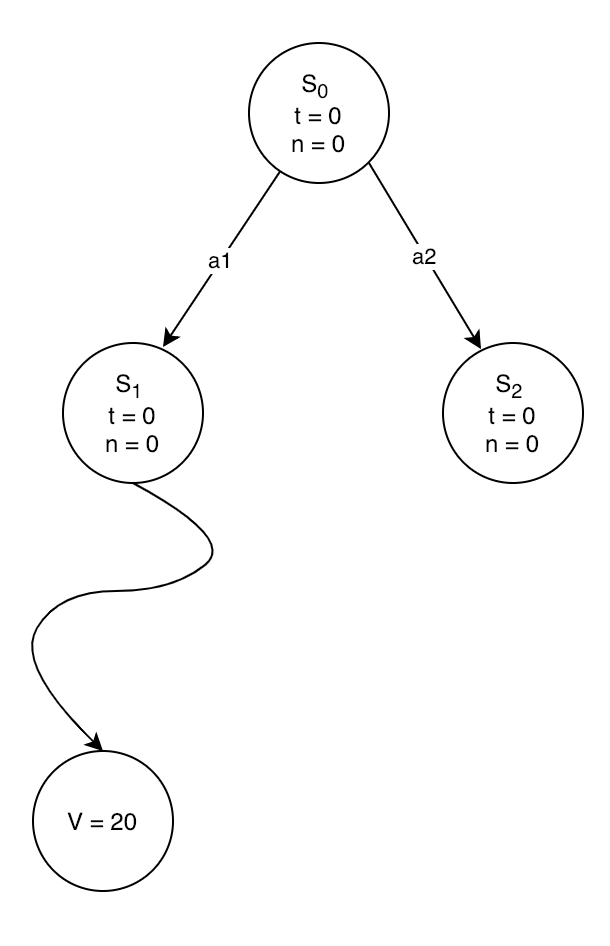

- Now comes the 4th phase, or the backpropogation phase. The value of the leaf node (20) is backpropogated all the way to the root node. So now, t = 20 and n = 1 for nodes S1 and S0

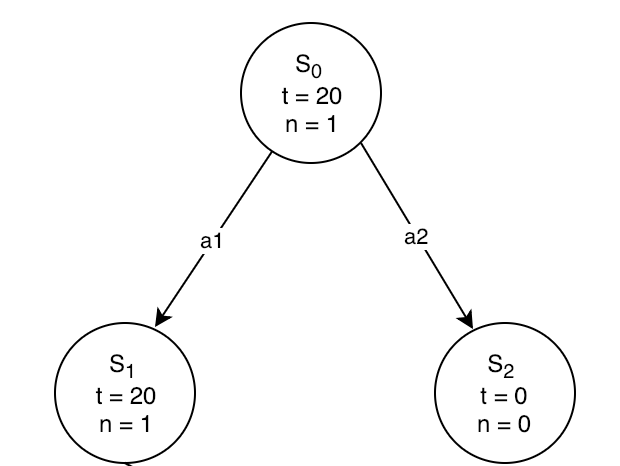

That’s the end of the first iteration. The way MCTS works is that we run it for a defined number of iterations or until we are out of time. This will tell us what is the best action at each step that one should take to get the maximum return.

Iteration 2:

- We go back to the initial state and ask which child node to visit next. Once again, we calculate the UCB values, which will be 20 + 2 * sqrt(ln(1)/1) = 20 for S1 and infinity for S2. Since S2 has the higher value, we will choose that node.
- Rollout will be done at S2 to get to the value 10 which will be backpropogated to the root node. The value at root node now is 30.

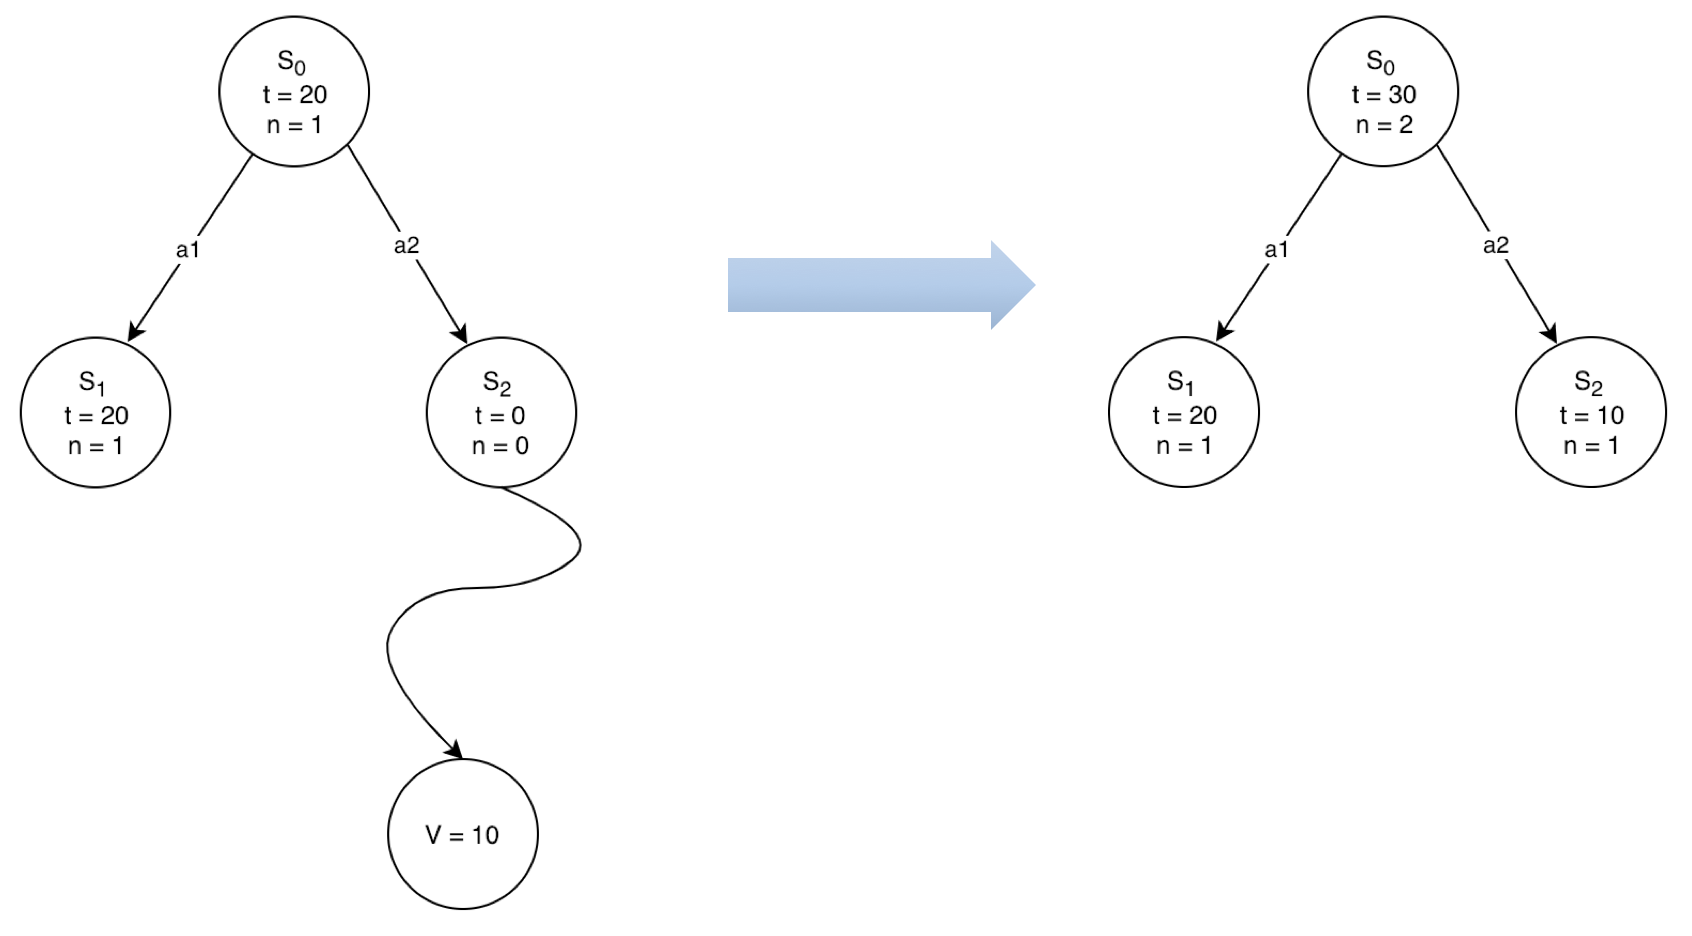

Iteration 3:

- In the below diagram, S1 has a higher UCB1 value and hence the expansion should be done here:

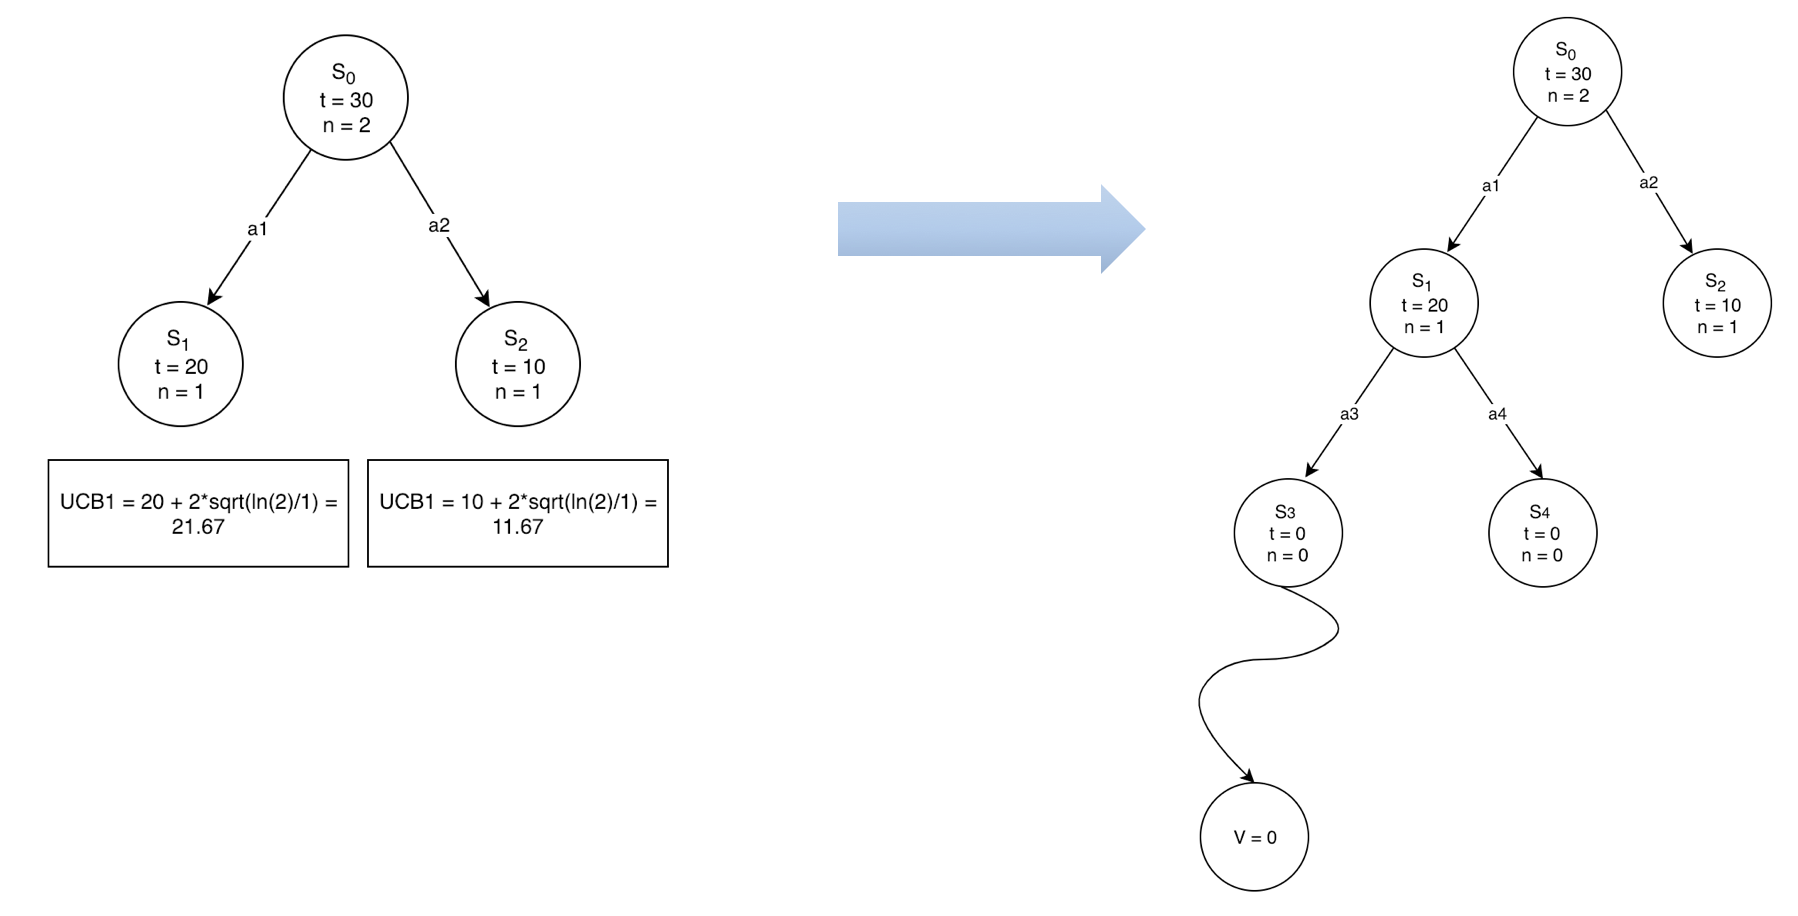

Iteration 4:

- We again have to choose between S1 and S2. The UCB value for S1 comes out to be 11.48 and 12.10 for S2:

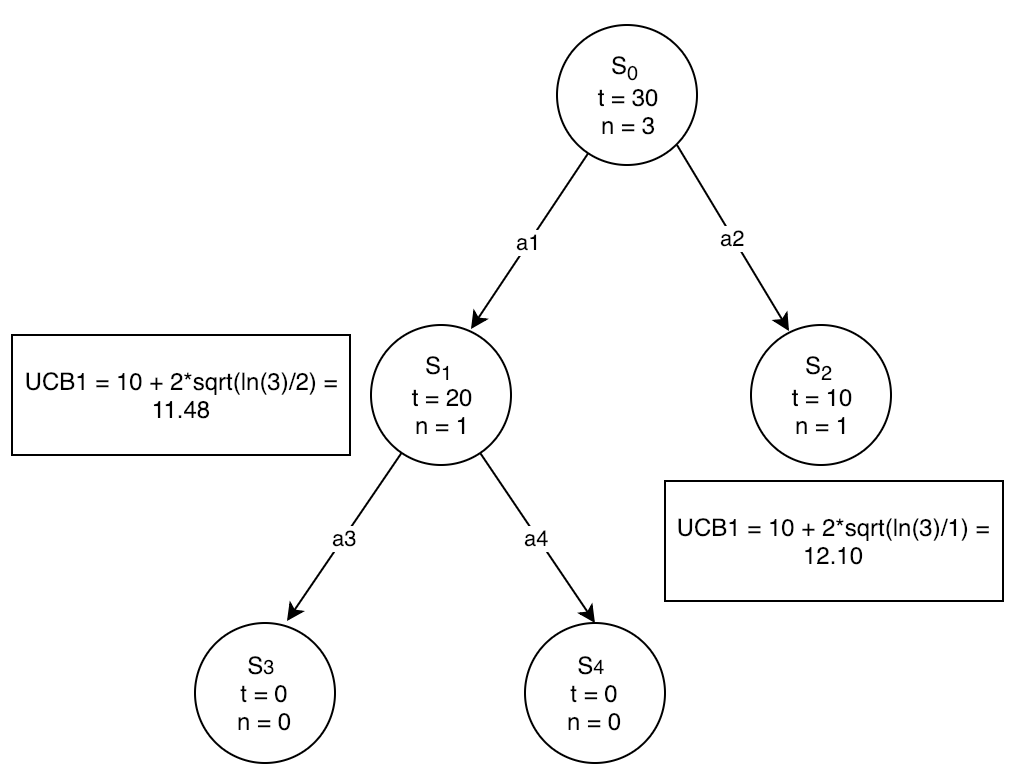

- We’ll do the expansion step at S2 since that’s our new current node. On expansion, 2 new nodes are created – S5 and S6. Since these are 2 new states, a rollout is done till the leaf node to get the value and backpropogate.

That is the gist of this algorithm. We can perform more iterations as long as required (or is computationally possible). The underlying idea is that the estimate of values at each node becomes more accurate as the number of iterations keep increasing.

Now let's implement the codes of MCTS. First, we need to define the node structure.

In [6]:
class MCT_Node:
    """Node in the Monte Carlo search tree, keeps track of the children states."""

    def __init__(self, parent=None, state=None, U=0, N=0):
        self.__dict__.update(parent=parent, state=state, U=U, N=N)
        self.children = {}
        self.actions = None

Then define the function to calculate UCB value.

In [7]:
def ucb(n, C=1.4):
    return np.inf if n.N == 0 else n.U / n.N + C * np.sqrt(np.log(n.parent.N) / n.N)


Finally, we define the function for MCTS.

In [8]:
def monte_carlo_tree_search(state, game, N=1000):
    def select(n):
        """select a leaf node in the tree"""
        if n.children:
            return select(max(n.children.keys(), key=ucb))
        else:
            return n

    def expand(n):
        """expand the leaf node by adding all its children states"""
        if not n.children and not game.terminal_test(n.state):
            n.children = {MCT_Node(state=game.result(n.state, action), parent=n): action
                          for action in game.actions(n.state)}
        return select(n)

    def simulate(game, state):
        """simulate the utility of current state by random picking a step"""
        player = game.to_move(state)
        while not game.terminal_test(state):
            action = random.choice(list(game.actions(state)))
            state = game.result(state, action)
        v = game.utility(state, player)
        return -v

    def backprop(n, utility):
        """passing the utility back to all parent nodes"""
        if utility > 0:
            n.U += utility
        n.N += 1
        if n.parent:
            backprop(n.parent, -utility)
            
    starttime = datetime.datetime.now()
    root = MCT_Node(state=state)
    

    for _ in range(N):
        leaf = select(root)
        child = expand(leaf)
        result = simulate(game, child.state)
        backprop(child, result)

    max_state = max(root.children, key=lambda p: p.N)
    
    endtime = datetime.datetime.now()
    duringtime = endtime-starttime        
    print("Elapsed time for monte carlo tree search algorithm: " + str(duringtime.microseconds) + " microseconds.")
    return root.children.get(max_state)

# PLAYERS

So, we have finished the implementation of the `TicTacToe` classes. We need more to create an AI that can actually play games. 

In [9]:
def player(search_algorithm):
    """A game player who uses the specified search algorithm"""
    return lambda game, state: search_algorithm(game, state)[1]

## query_player
The `query_player` function allows you, a human opponent, to play the game. This function requires a `display` method to be implemented in your game class, so that successive game states can be displayed on the terminal, making it easier for you to visualize the game and play accordingly. 

In [10]:
def query_player(game, state):
    """Make a move by querying standard input."""
    print("current state:")
    game.display(state)
    print("available moves: {}".format(game.actions(state)))
    print("")
    move = None
    if game.actions(state):
        move_string = input('Your move? ')
        try:
            move = eval(move_string)
        except NameError:
            move = move_string
    else:
        print('no legal moves: passing turn to next player')
    print("query_player_move: "+str(move))
    return move

## random_player
The `random_player` is a function that plays random moves in the game.

In [11]:
def random_player(game, state):
    """A player that chooses a legal move at random."""
    return random.choice(game.actions(state)) if game.actions(state) else None

## alphabeta_player
The `alphabeta_player`, on the other hand, calls the `alphabeta_search` function, which returns the best move in the current game state. Thus, the `alphabeta_player` always plays the best move given a game state, assuming that the game tree is small enough to search entirely.

In [12]:
def alpha_beta_player(game, state):
    return alpha_beta_search(state, game)

## minimax_player
The `minimax_player`, on the other hand calls the `minimax_search` function which returns the best move in the current game state.

In [13]:
def min_max_player(game, state):
    return minmax_decision(state, game)

## mcts_player
The `mcts_player` calls the `monte_carlo_tree_search` function to return the best move in the current game state within the predefined iterations.

In [14]:
def mcts_player(game, state):
    return monte_carlo_tree_search(state, game)

## play_game
The `play_game` function will be the one that will actually be used to play the game. You pass as arguments to it an instance of the game you want to play and the players you want in this game. Use it to play AI vs AI, AI vs human, or even human vs human matches!

In [15]:
def play_game(game, strategies: dict, verbose=False):
    """Play a turn-taking game. `strategies` is a {player_name: function} dict,
    where function(state, game) is used to get the player's move."""
    state = game.initial
    while not game.terminal_test(state):
        player = state.to_move
        move = strategies[player](game, state)
        state = game.result(state, move)
        if verbose: 
            print('Player', player, 'move:', move)
#            print(state)
    print("current state:")
    game.display(state)
    if state.utility == 1:
        print("Player X win the game!")
    elif state.utility == -1:
        print("Player O win the game!")
    else:
        print("Draw Game!")
    return state

## Now Let's play the game!

In [16]:
""" AI VS AI mode"""
play_game(TicTacToe(), dict(X=alpha_beta_player, O=mcts_player), verbose=True).utility

Elapsed time for alpha-beta pruning algorithm: 90759 microseconds.
Player X move: (1, 1)
Elapsed time for monte carlo tree search algorithm: 95744 microseconds.
Player O move: (2, 2)
Elapsed time for alpha-beta pruning algorithm: 3989 microseconds.
Player X move: (1, 2)
Elapsed time for monte carlo tree search algorithm: 49897 microseconds.
Player O move: (1, 3)
Elapsed time for alpha-beta pruning algorithm: 0 microseconds.
Player X move: (3, 1)
Elapsed time for monte carlo tree search algorithm: 26901 microseconds.
Player O move: (2, 1)
Elapsed time for alpha-beta pruning algorithm: 0 microseconds.
Player X move: (2, 3)
Elapsed time for monte carlo tree search algorithm: 9973 microseconds.
Player O move: (3, 2)
Elapsed time for alpha-beta pruning algorithm: 0 microseconds.
Player X move: (3, 3)
current state:
X X O 
O O X 
X O X 
Draw Game!


0

In [17]:
""" HUMAN VS AI mode"""  
play_game(TicTacToe(), dict(X=query_player, O=random_player), verbose=True).utility

current state:
. . . 
. . . 
. . . 
available moves: [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

Your move? 1,1
query_player_move: (1, 1)
Player X move: (1, 1)
Player O move: (2, 3)
current state:
X . . 
. . O 
. . . 
available moves: [(1, 2), (1, 3), (2, 1), (2, 2), (3, 1), (3, 2), (3, 3)]

Your move? 2,2
query_player_move: (2, 2)
Player X move: (2, 2)
Player O move: (1, 2)
current state:
X O . 
. X O 
. . . 
available moves: [(1, 3), (2, 1), (3, 1), (3, 2), (3, 3)]

Your move? 3,3
query_player_move: (3, 3)
Player X move: (3, 3)
current state:
X O . 
. X O 
. . X 
Player X win the game!


1

In [18]:
""" HUMAN VS HUMAN mode"""
play_game(TicTacToe(), dict(X=query_player, O=query_player), verbose=True).utility

current state:
. . . 
. . . 
. . . 
available moves: [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

Your move? 2,1
query_player_move: (2, 1)
Player X move: (2, 1)
current state:
. . . 
X . . 
. . . 
available moves: [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

Your move? 2,2
query_player_move: (2, 2)
Player O move: (2, 2)
current state:
. . . 
X O . 
. . . 
available moves: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 1), (3, 2), (3, 3)]

Your move? 1,1
query_player_move: (1, 1)
Player X move: (1, 1)
current state:
X . . 
X O . 
. . . 
available moves: [(1, 2), (1, 3), (2, 3), (3, 1), (3, 2), (3, 3)]

Your move? 3,1
query_player_move: (3, 1)
Player O move: (3, 1)
current state:
X . . 
X O . 
O . . 
available moves: [(1, 2), (1, 3), (2, 3), (3, 2), (3, 3)]

Your move? 1,2
query_player_move: (1, 2)
Player X move: (1, 2)
current state:
X X . 
X O . 
O . . 
available moves: [(1, 3), (2, 3), (3, 2), (3, 3)]

Your move? 1,3
query_player_move: (1, 3)
Pl

-1

## References

- https://github.com/aimacode/aima-python
- https://www.analyticsvidhya.com/blog/2019/01/monte-carlo-tree-search-introduction-algorithm-deepmind-alphago/
- https://towardsdatascience.com/monte-carlo-tree-search-158a917a8baa
- Winands M.H.M. (2017) Monte-Carlo Tree Search in Board Games. In: Nakatsu R., Rauterberg M., Ciancarini P. (eds) Handbook of Digital Games and Entertainment Technologies. Springer, Singapore. https://doi.org/10.1007/978-981-4560-50-4_27
